# Hierarchical Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('BreastCancerData.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Drop unnecessary columns

In [4]:
data=data.drop(['id'],axis=1)

In [5]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
def myfunction(x):
    if x == 'B':
        return 0
    elif x == 'M':
        return 1
    
data['diagnosis']=data['diagnosis'].apply(myfunction)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#standardise data
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(data.iloc[:,1:])
X.shape

(569, 30)

The result of standardization is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with:
μ=0 and σ=1
where μ is the mean (average) and σ is the standard deviation from the mean
Standardizing the features so that they are centered around 0 with a standard deviation of 1 is important here because 
- we are comparing measurements that have different units
- features of our input data set have large differences between their ranges
- clustering models are distance based algorithms, in order to measure similarities between observations and form clusters they use a distance metric. So, features with high ranges will have a bigger influence on the clustering. Therefore, standardization is required before building a clustering model.
We need to perform standardization to overcome these problems.

# Without PCA

In [8]:
from scipy.cluster.hierarchy import dendrogram,linkage

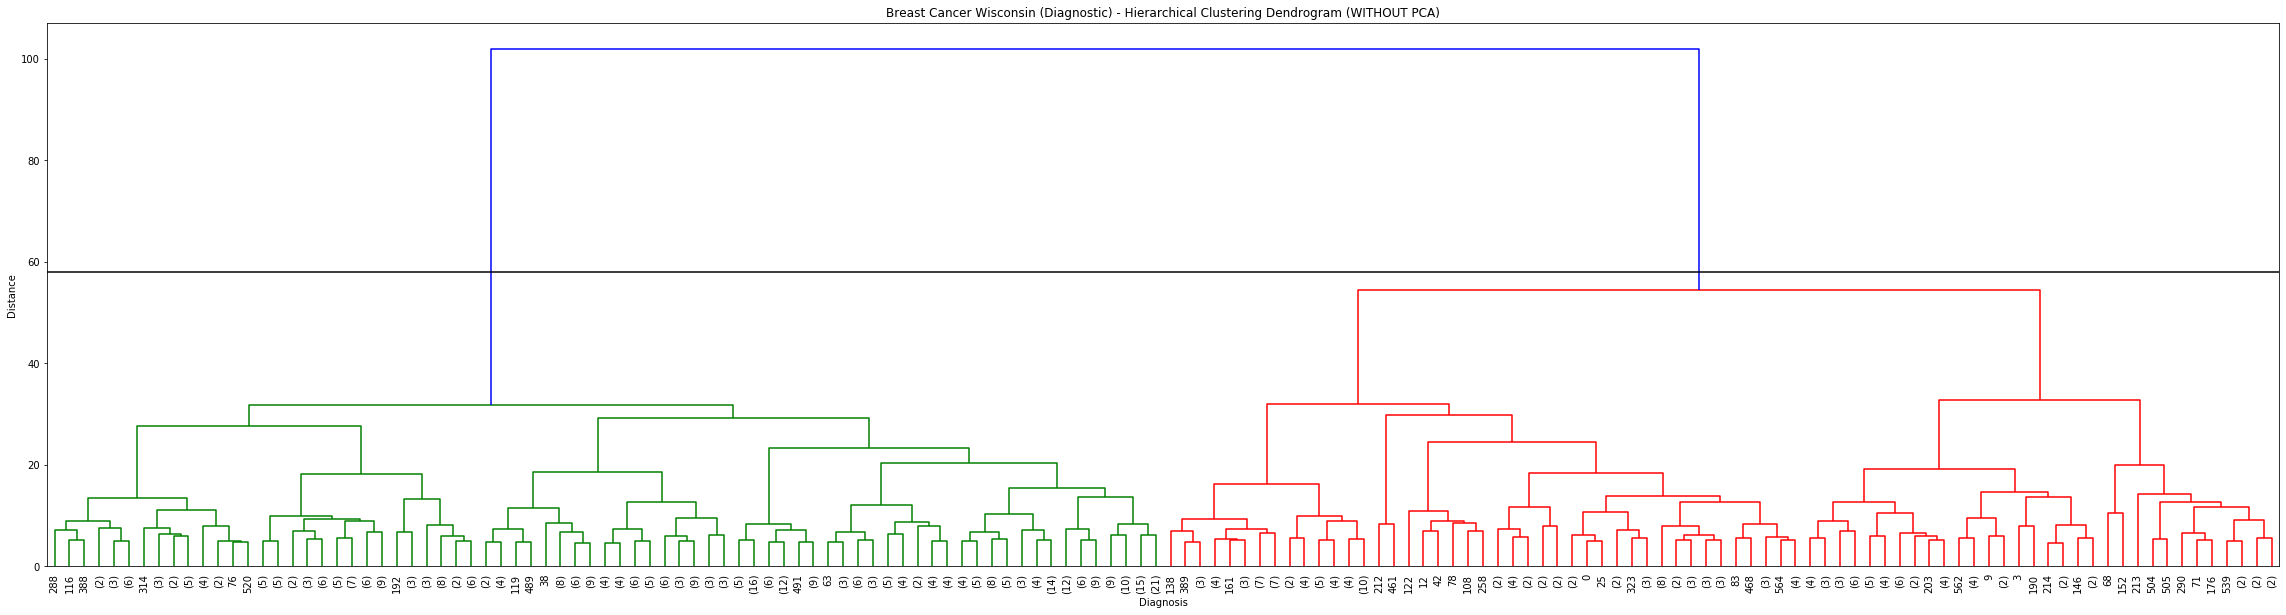

In [9]:
plt.figure(figsize = (40,10))
plt.title('Breast Cancer Wisconsin (Diagnostic) - Hierarchical Clustering Dendrogram (WITHOUT PCA)')
plt.xlabel('Diagnosis')
plt.ylabel('Distance')

dendrogram(
    linkage(X,'ward'),
    truncate_mode='lastp',
    p=150,
    leaf_rotation=90,
    leaf_font_size=10
)

plt.axhline(y=58, c='k')
plt.show()

- Usage of ward algorithm to calculate distance between newly formed clusters. This algorithm involves variance minimization.
- Original dendrogram is difficult to read, because the generated linkage matrix is large, so we make use of truncate mode to condense the dendrogram.
- lastp and p refer to the last p merged clusters. In this dendrogram, the last 150 merged clusters have been displayed.

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
clustering = AgglomerativeClustering(linkage='ward',n_clusters=2)

In [12]:
#record time take to train model
import time
#start timer
start_time=time.time()
clustering.fit(X)
#stop timer
end_time=time.time()
duration=end_time-start_time
#printing duration of timing
print("Duration of model training: %s"%(duration))

Duration of model training: 0.02998518943786621


In [13]:
print(np.unique(clustering.labels_))

[0 1]


In [14]:
from sklearn import preprocessing
q=preprocessing.MinMaxScaler().fit_transform(X)
q.shape

(569, 30)

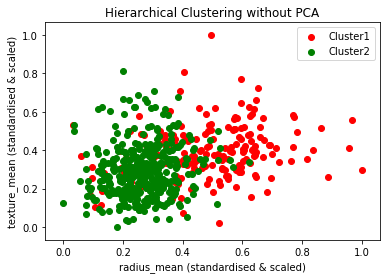

In [15]:
colors="rgb"
for i in np.unique(clustering.labels_):
    plt.scatter(q[clustering.labels_==i,0],
                q[clustering.labels_==i,1],
                color=colors[i],label='Cluster'+str(i+1))
    
plt.legend()
plt.title('Hierarchical Clustering without PCA')
plt.xlabel(data.columns[1]+' (standardised & scaled)')
plt.ylabel(data.columns[2]+' (standardised & scaled)')
plt.show()

Two distinct clusters can be observed from the above scatter plot. However, a significant portion of cluster 1 does overlap with cluster 2. Most of the data points belonging to cluster 1 tend to have a higher texture mean and higher radius mean than those belonging to cluster 2. In general, the agglomerative clustering algorithm has clustered the data effectively.

# With PCA

Data has already been standardised

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
pca.fit_transform(X)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


From this we can notice that with just the first two components we can actually explain more than 60% of the variance. This is impressive especially given that we are working with a 30 dimension data set.

In [17]:
pca=PCA(n_components=2)
X2=pca.fit_transform(X)
X2.shape

(569, 2)

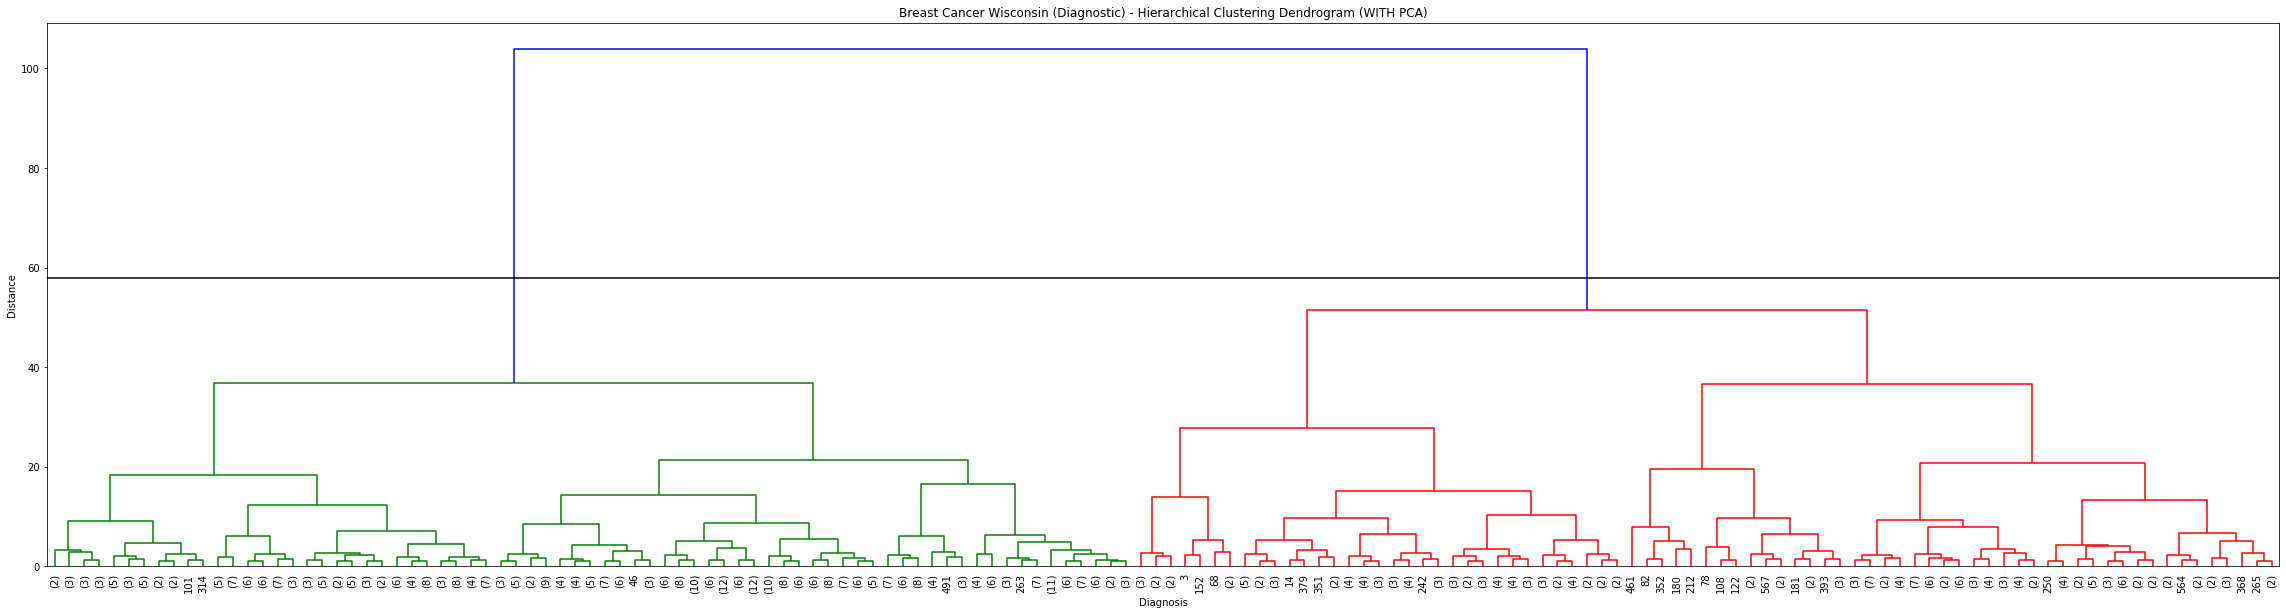

In [18]:
plt.figure(figsize = (40,10))
plt.title('Breast Cancer Wisconsin (Diagnostic) - Hierarchical Clustering Dendrogram (WITH PCA)')
plt.xlabel('Diagnosis')
plt.ylabel('Distance')

dendrogram(
    linkage(X2,'ward'),
    truncate_mode='lastp',
    p=150,
    leaf_rotation=90,
    leaf_font_size=10
)

plt.axhline(y=58, c='k')
plt.show()

In [19]:
start_time=time.time()
clustering.fit(X2)
#stop timer
end_time=time.time()
duration=end_time-start_time
#printing duration of timing
print("Duration of model training: %s"%(duration))

Duration of model training: 0.017989635467529297


Time to taken to train model after performing PCA on data was significantly shorter.

In [20]:
g=preprocessing.MinMaxScaler().fit_transform(X2)
g.shape

(569, 2)

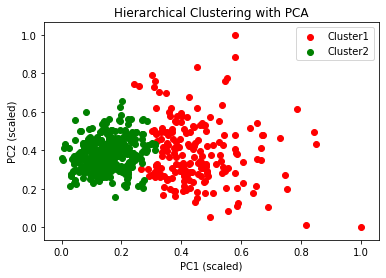

In [21]:
colors="rgb"
for i in np.unique(clustering.labels_):
    plt.scatter(g[clustering.labels_==i,0],
                g[clustering.labels_==i,1],
                color=colors[i],label='Cluster'+str(i+1))
    
plt.legend()
plt.title('Hierarchical Clustering with PCA')
plt.xlabel('PC1 (scaled)')
plt.ylabel('PC2 (scaled)')
plt.show()

Again two distinct clusters can be observed from the above scatter plot. However, this time a significant portion of cluster 1 does NOT overlap with cluster 2. In general, the agglomerative clustering algorithm has clustered the data more effectively when the data had undergone PCA compared to the data which had not undergone PCA.

# With Feature Engineering

In [22]:
df=data.iloc[:,:]

In [23]:
df.shape

(569, 31)

In [24]:
df_std=(df-df.mean())/(df.std())

In [25]:
df_std.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.296535,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.296535,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.296535,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,1.296535,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.296535,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [26]:
corr_mat=df_std.corr()

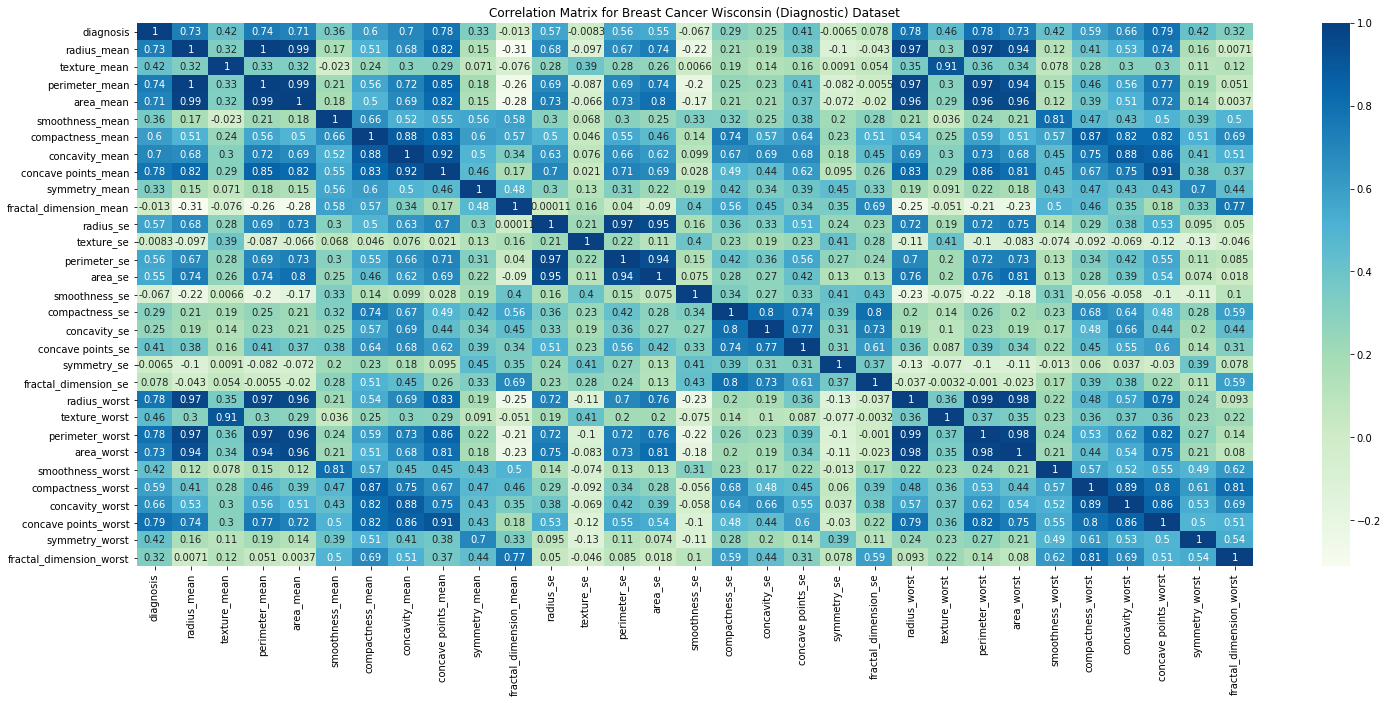

In [27]:
plt.figure(figsize=(25,10))
sns.heatmap(data=corr_mat,annot=True,cmap='GnBu')
plt.title('Correlation Matrix for Breast Cancer Wisconsin (Diagnostic) Dataset')
plt.show()

In [28]:
target='diagnosis'
candidates=corr_mat.index[(corr_mat[target]>0.5)| (corr_mat[target]<-0.5)].values

In [29]:
candidates = candidates[candidates!=target]
print('Correlated to',target,', ',candidates)

Correlated to diagnosis ,  ['radius_mean' 'perimeter_mean' 'area_mean' 'compactness_mean'
 'concavity_mean' 'concave points_mean' 'radius_se' 'perimeter_se'
 'area_se' 'radius_worst' 'perimeter_worst' 'area_worst'
 'compactness_worst' 'concavity_worst' 'concave points_worst']


In [30]:
removed=[]
for c1 in candidates:
    for c2 in candidates:
        if (c1 not in removed) and (c2 not in removed):
            if c1!=c2:
                coeff = corr_mat.loc[c1,c2]
                if coeff>0.6 or coeff<-0.6:
                    removed.append(c1)
print('Removed: ',removed)
selected_features=[x for x in candidates if x not in removed]
print('Selected features: ', selected_features)

Removed:  ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst']
Selected features:  ['concave points_worst']


In [40]:
xf = df_std.drop(removed,axis=1)

In [41]:
xf.head()

,diagnosis,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.296535,-2.071512,1.567087,2.215566,2.253764,-0.564768,-0.213814,1.315704,0.723390,0.660239,1.147747,0.906286,-1.358098,1.306537,2.294058,2.748204,1.935312
1,1.296535,-0.353322,-0.826235,0.001391,-0.867889,-0.875473,-0.604819,-0.692317,-0.440393,0.259933,-0.804742,-0.099356,-0.368879,-0.375282,1.086129,-0.243675,0.280943
2,1.296535,0.455786,0.941382,0.938859,-0.397658,-0.779398,-0.296744,0.814257,0.212889,1.423575,0.236827,0.293301,-0.023953,0.526944,1.953282,1.151242,0.201214
3,1.296535,0.253509,3.280667,2.864862,4.906602,-0.110312,0.689095,2.741868,0.818798,1.114027,4.728520,2.045711,0.133866,3.391291,2.173873,6.040726,4.930672
4,1.296535,-1.150804,0.280125,-0.009552,-0.561956,-0.789549,1.481763,-0.048477,0.827742,1.143199,-0.360775,0.498889,-1.465481,0.220362,0.728618,-0.867590,-0.396751


In [42]:
xf.shape

(569, 17)

In [34]:
xf2=xf.iloc[:,1:17].values

In [35]:
xf2.shape

(569, 16)

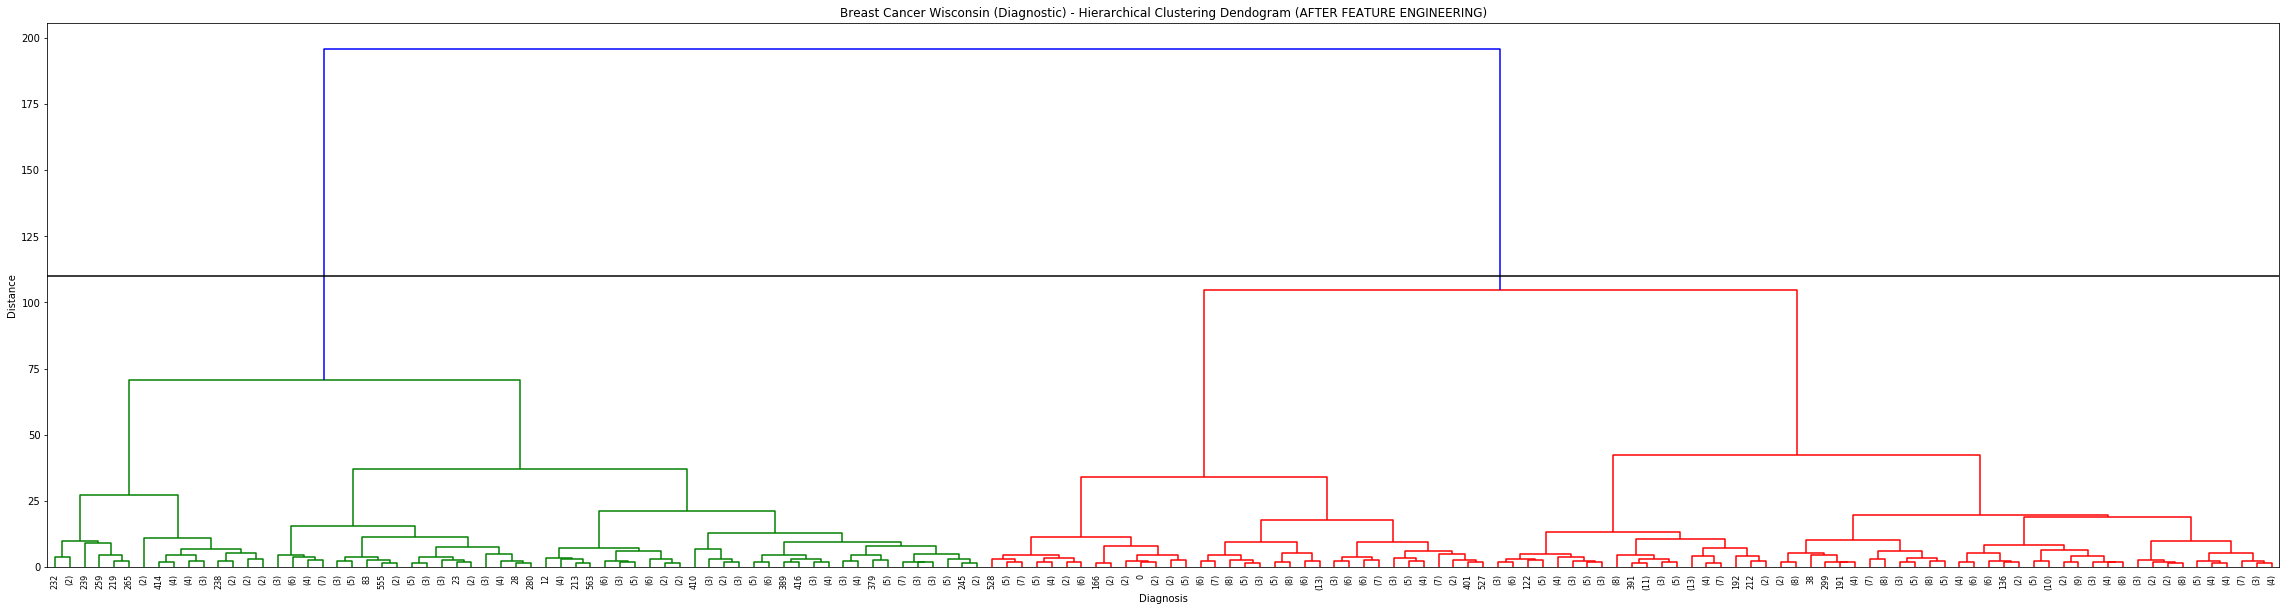

In [36]:
plt.figure(figsize = (40,10))
plt.title('Breast Cancer Wisconsin (Diagnostic) - Hierarchical Clustering Dendogram (AFTER FEATURE ENGINEERING)')
plt.xlabel('Diagnosis')
plt.ylabel('Distance')

dendrogram(
    linkage(xf2,'ward'),
    truncate_mode='lastp',
    p=150,
    leaf_rotation=90,
    leaf_font_size=8
)

plt.axhline(y=110, c='k')
plt.show()

In [37]:
start_time=time.time()
clustering.fit(xf2)
#stop timer
end_time=time.time()
duration=end_time-start_time
#printing duration of timing
print("Duration of model training: %s"%(duration))

Duration of model training: 0.021988391876220703


In [38]:
h=preprocessing.MinMaxScaler().fit_transform(xf2)
h.shape

(569, 16)

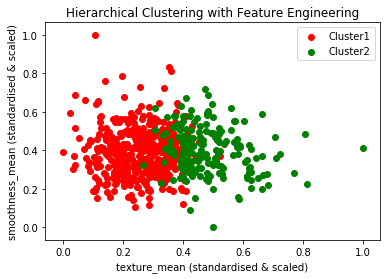

In [39]:
colors="rgb"
for i in np.unique(clustering.labels_):
    plt.scatter(h[clustering.labels_==i,0],
                h[clustering.labels_==i,1],
                color=colors[i],label='Cluster'+str(i+1))
    
plt.legend()
plt.title('Hierarchical Clustering with Feature Engineering')
plt.xlabel(xf.columns[1]+' (standardised & scaled)')
plt.ylabel(xf.columns[2]+' (standardised & scaled)')
plt.show()